# 453 - Application Domain : In-class Exercise 1

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Dictionary</a></span><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Import-the-data" data-toc-modified-id="Import-the-data-3"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the data</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-4"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-5"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build Model</a></span></li><li><span><a href="#Inference" data-toc-modified-id="Inference-6"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inference</a></span></li></ul></div>

### Data Dictionary

* **Actual Sales** - This variable represents the sales measured by the manufacturer on a weekly basis. This variable is an aggregate sales variable across all products & locations at which this product is sold. 


* **Average_Price** - This variable represents the average price of the product across all product categories & UPCs. 


* **Sales Units** - This variable represents the sales measured in units sold on a weekly basis.


* **TV GRP** - This variable represents the weekly GRPs for TV bought by the brand. The GRPs can be translated into impressions using the following conversion rate: 1 GRP = 1,200,000 impressions. 


* **Display Impressions** - The variable represents the weekly ad impressions for the brand through banner ads on websites or mobile phone apps. 


* **Search Clicks**	- This variable represents the paid search advertisement done by the brand on Google and Bing. The metric measures the clicks done by users on the ads.


* **Distribution (ACV)** - This variable is an index variable that represents the comparative distribution levels of a product across various weeks of data. An index of 100 implies the maximum distribution of the product. All other distribution numbers are scaled down based on a maximum distribution of 100. 


* **Price Reduction Units**	- This variable is an index variable that represents the temporary price reduction levels of a product across various weeks of data. An index of 100 implies the maximum number of units under temporary price reductions of the product. 


* **Trade Promotions Units** - This variable is an index variable that represents the Trade Promotions levels of a product across various weeks of data. An index of 100 implies the maximum number of units under trade promotions for the product. 


* **Seasonality** - This variable is an index variable that represents the seasonality associated with the consumer demand for this product.


* **CPI** - This variable is an index variable that represents the Consumer Price Index for this product's market. The CPI variable represents the cost of essential goods for an average household.


* **Coupons** - The coupons represents various weeks where the manufacturer circulate coupons at various retail outlets where this product is sold. These coupons are typically valid for a duration of 4 - 8 weeks.


* **Coupon_Availability** - New categorical variable added for analysis. This variable represents if coupons were available with the customers for that week. A value of 1 means that coupons were available while 0 represents otherwise.

### Load the libraries

In [24]:
# For data loading and manipulation
import pandas as pd
import numpy as np

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For model development
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

### Import the data

In [25]:
data = pd.read_csv("sales_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
Actual_Sales              30 non-null int64
Average_Price             30 non-null float64
Sales_Units               30 non-null int64
TV_GRP                    30 non-null int64
Display_Impressions       30 non-null int64
Search_Clicks             30 non-null int64
Distribution_ACV          30 non-null int64
Price_Reduction_Units     30 non-null int64
Trade_Promotions_Units    30 non-null int64
Seasonality               30 non-null int64
CPI                       30 non-null int64
Coupon_Availability       30 non-null int64
Coupons                   30 non-null int64
dtypes: float64(1), int64(12)
memory usage: 3.1 KB


In [26]:
data['week'] = data.index
data

,Actual_Sales,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupon_Availability,Coupons,week
0,2112912,3.03,697331,75,51519,10655,52,53,84,91,88,0,1000000,0
1,2170007,2.99,725755,107,89193,15214,73,93,92,60,74,1,0,1
2,2284844,2.90,787877,98,65084,18146,60,57,56,67,98,1,0,2
3,2257913,3.03,745186,149,55083,19640,93,75,81,71,69,1,0,3
4,2257829,3.05,740272,108,50503,17747,57,95,88,82,75,1,0,4
5,2205141,2.97,742472,125,94760,10391,83,82,91,82,97,1,0,5
6,2238231,2.95,758722,58,98469,19155,90,68,79,94,74,1,0,6
7,2282328,3.00,760776,51,90496,11068,76,55,85,70,72,1,0,7
8,2280046,2.87,794441,133,74801,14411,86,97,90,71,91,1,0,8
9,2302181,3.03,759796,140,75663,15193,73,85,85,63,80,0,0,9


The coupons are given out in 1st week and 18th week. They can be used within the period of 4-8 weeks as per the given info. We have created a new categorical variable 'Coupon_Availability' wherein '1' represents that the coupon was available in that week while '0' represents otherwise. Further, for simplicity, we have assumed that the coupon was available for consequent 8 weeks from the week when the couon was distributed i.e. week# 2-9 and 19-26

### Explore the data

In [27]:
data.describe()

,Actual_Sales,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupon_Availability,Coupons,week
count,3.000000e+01,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.219432e+06,2.97300,746931.033333,72.300000,68353.366667,15554.800000,73.100000,76.033333,76.833333,71.000000,76.566667,0.533333,66666.666667,14.500000
std,9.452196e+04,0.05497,37865.227702,55.589722,15337.845224,3084.027465,13.321877,17.418744,13.926119,12.608153,12.190113,0.507416,253708.131702,8.803408
min,1.962898e+06,2.87000,643573.000000,0.000000,50503.000000,10391.000000,52.000000,51.000000,50.000000,50.000000,51.000000,0.000000,0.000000,0.000000
25%,2.157826e+06,2.93000,724758.250000,0.000000,53119.250000,12844.000000,62.000000,58.500000,67.500000,63.000000,69.500000,0.000000,0.000000,7.250000
50%,2.248030e+06,2.99000,753556.000000,80.000000,64913.000000,15471.500000,73.000000,77.500000,80.500000,67.500000,77.500000,1.000000,0.000000,14.500000
75%,2.284215e+06,3.01750,762695.000000,116.750000,77622.750000,18069.750000,82.750000,93.000000,88.000000,80.500000,82.750000,1.000000,0.000000,21.750000
max,2.341478e+06,3.05000,805646.000000,149.000000,98469.000000,19970.000000,100.000000,100.000000,95.000000,94.000000,98.000000,1.000000,1000000.000000,29.000000


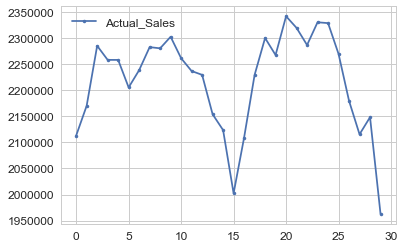

In [28]:
sns.set(style="whitegrid", font_scale=1.2)
data[['Actual_Sales']].plot(style='.-')

Sales starts increasing between week 1-10 (minor dip in 6), starts decreasing after 10th week and extremely low in 16th week. The pattern repeats in next 15 weeks.

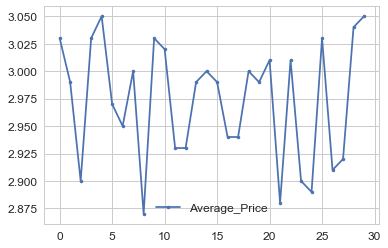

In [29]:
data[['Average_Price']].plot(style='.-')

Average price fluctuates but doesn't correlate with the sales pattern. The range of fluctuation is small, 2.87-3.05.

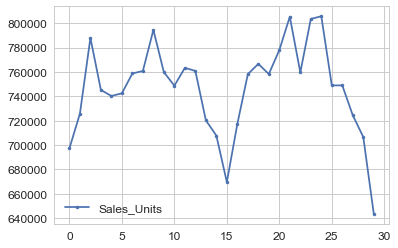

In [30]:
data[['Sales_Units']].plot(style='.-')

Sales units follows the exact same pattern as $ sales, and price did not have very high fluctuations corresponding to the pattern, so maybe other variables like advertising are affecting the sales.

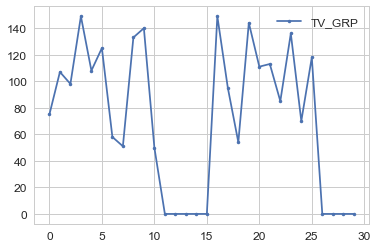

In [31]:
data[['TV_GRP']].plot(style='.-')

TV GRPs are not bought between week 12-16. Same in weeks 27-30. Intuitively, looks like reduction in TV advertising might have led to sales decrease.

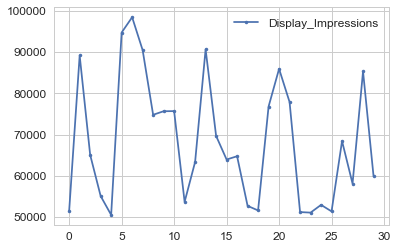

In [32]:
data[['Display_Impressions']].plot(style='.-')

Display Impressions fluctuate but donot correlate with the sales pattern. The range of fluctuation is significant, 50503-98469

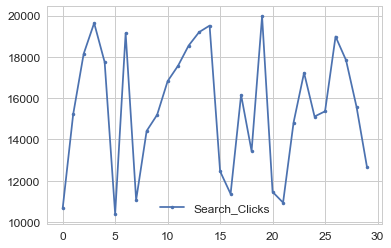

In [33]:
data[['Search_Clicks']].plot(style='.-')

Search clicks follow similar pattern as Display Impressions. The range of fluctuation is again significant, 10391-19970

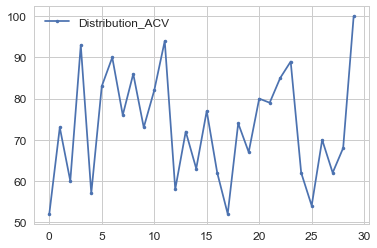

In [34]:
data[['Distribution_ACV']].plot(style='.-')

Even though there is a lot of randomness at first, overall if we look closely at the data, the distribution was low in first week and in weeks 13-20 and 25-29. These periods overlap with the period of low sales and hence might explain the lower $ sales

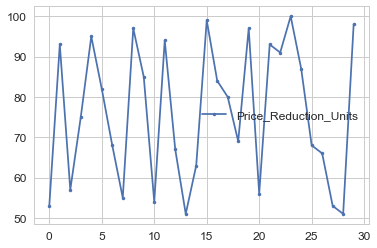

In [44]:
data[['Price_Reduction_Units']].plot(style='.-')

Price Reduction Units fluctuate but donot necessarily correlate with the sales pattern. The range of fluctuation is significant, 51-100

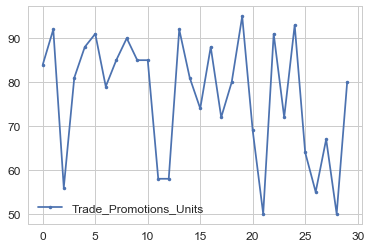

In [36]:
data[['Trade_Promotions_Units']].plot(style='.-')

Trade Promotion Units fluctuate and partly the weeks where they are low overlap with the dipping sales.

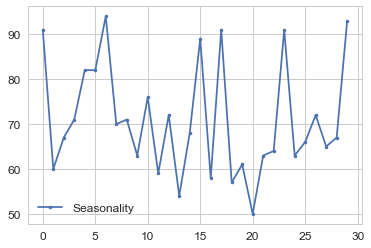

In [37]:
data[['Seasonality']].plot(style='.-')

Seasonality fluctuates and doesnot correlate with the sales pattern. The range of fluctuation is significant, 50-94

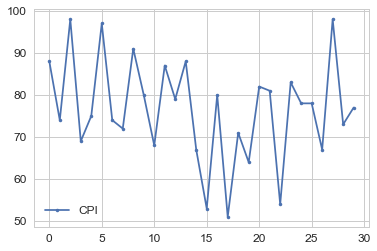

In [38]:
data[['CPI']].plot(style='.-')

API fluctuates and doesnot correlate with the sales pattern. The range of fluctuation is significant, 51-98

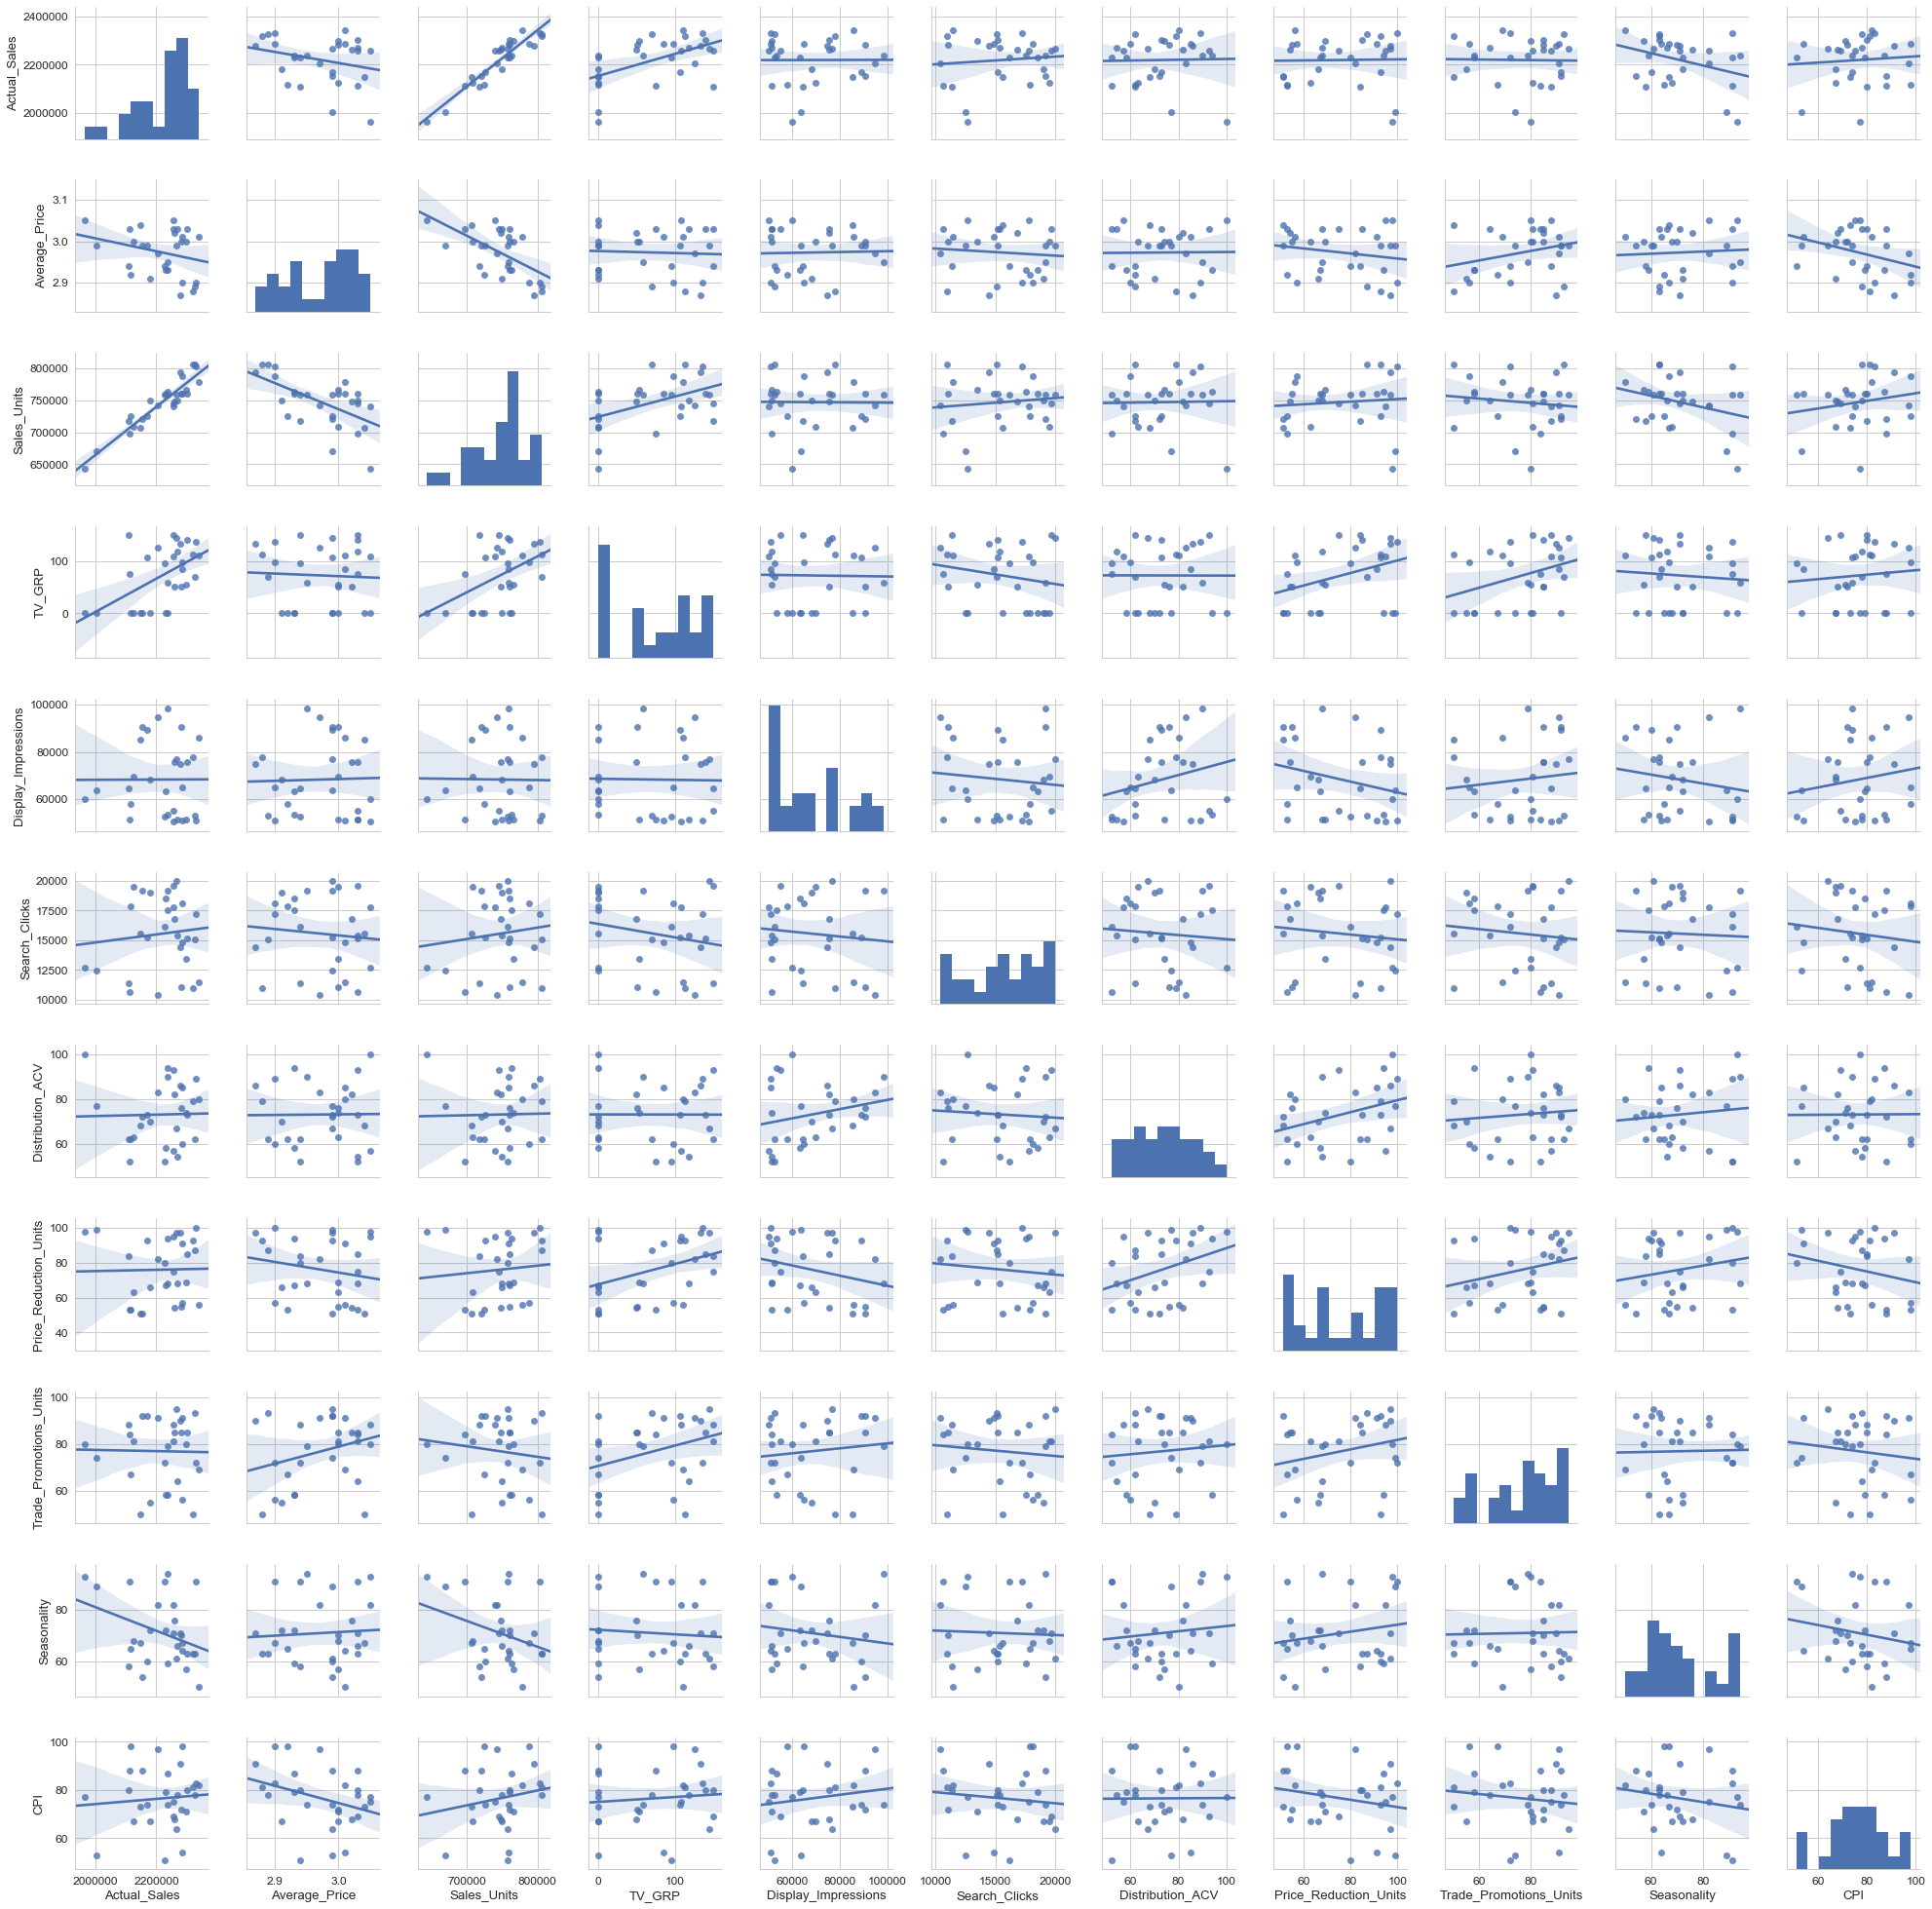

In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.pairplot(data[['Actual_Sales','Average_Price','Sales_Units','TV_GRP','Display_Impressions','Search_Clicks',
                   'Distribution_ACV','Price_Reduction_Units','Trade_Promotions_Units','Seasonality','CPI']],kind='reg')

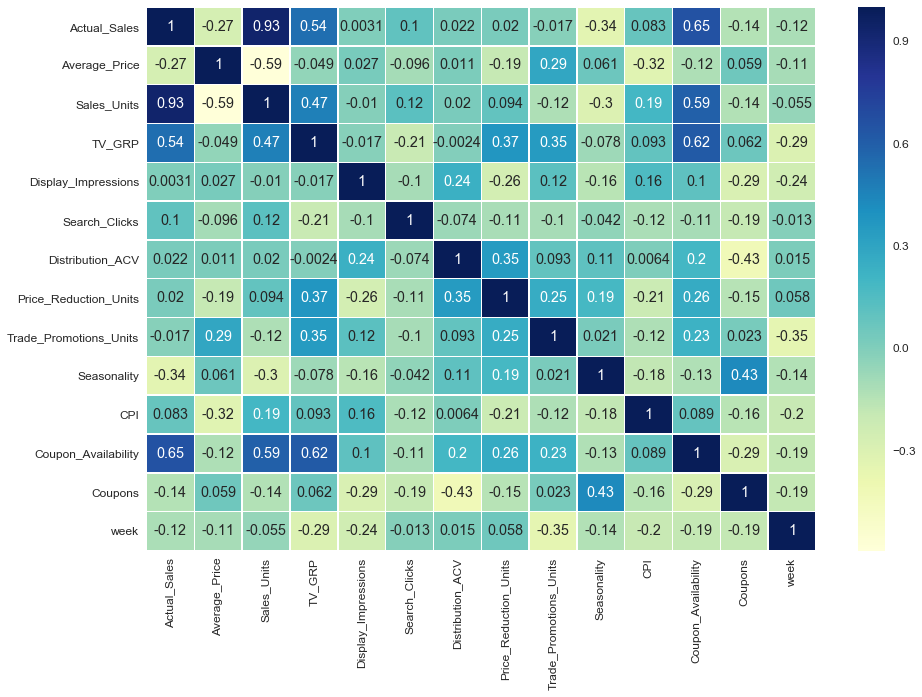

In [46]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

### Build Model

In [62]:
features = data[['Average_Price','Sales_Units','TV_GRP','Display_Impressions','Search_Clicks',
                   'Distribution_ACV','Price_Reduction_Units','Trade_Promotions_Units','Seasonality','CPI']]
response = data[['Actual_Sales']]

X_train,X_test,Y_train,Y_test = train_test_split(features,response,test_size=0.2,random_state = 1)
LR = LinearRegression()
LR.fit(X_train,Y_train)
print(LR.intercept_)
print(LR.coef_)
r_squared = LR.score(X_train,Y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)
print(LR.predict(X_test), Y_test)

##### Might need to standardize variables and see if it even makes sense to build a model with 30 data points ######

[-2216398.01759416]
[[  7.49200791e+05   2.97012671e+00   1.12982166e+01   2.68863632e-02
    1.00638822e-01  -2.21015790e+01  -3.29508733e+01  -4.58081490e+00
   -6.76714794e+01  -6.22910216e+01]]
0.999667558323 0.999411833956
[[ 2228746.87028166]
 [ 2323148.00148001]
 [ 2260840.53343469]
 [ 2268309.37473061]
 [ 2124709.77085026]
 [ 2341455.15886571]]     Actual_Sales
17       2228988
21       2319150
10       2261058
19       2267190
14       2123428
20       2341478


In [63]:
features = data[['Average_Price','TV_GRP','Display_Impressions','Search_Clicks',
                   'Distribution_ACV','Price_Reduction_Units','Trade_Promotions_Units','Seasonality','CPI', 
                 'Coupon_Availability']]
response = data[['Actual_Sales']]

X_train,X_test,Y_train,Y_test = train_test_split(features,response,test_size=0.2,random_state = 1)
LR = LinearRegression()
LR.fit(X_train,Y_train)
print(LR.intercept_)
print(LR.coef_)
r_squared = LR.score(X_train,Y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)
print(LR.predict(X_test), Y_test)
##### Might need to standardize variables and see if it even makes sense to build a model with 30 data points ######

[ 3198757.42159055]
[[ -2.90134472e+05   4.97174942e+02  -6.17977750e-01   6.23214662e+00
    2.01096693e+02  -7.97425378e+02  -6.60472506e+02  -2.00281281e+03
   -3.96876844e+02   1.04348234e+05]]
0.680754414038 0.435180886375
[[ 2157745.67068513]
 [ 2294105.3565338 ]
 [ 2143565.50941755]
 [ 2310000.5369675 ]
 [ 2153070.89063094]
 [ 2296471.62266125]]     Actual_Sales
17       2228988
21       2319150
10       2261058
19       2267190
14       2123428
20       2341478


In [67]:
import statsmodels.api as sm
from scipy import stats

X = data[['Average_Price','Sales_Units','TV_GRP','Display_Impressions','Search_Clicks',
                   'Distribution_ACV','Price_Reduction_Units','Trade_Promotions_Units','Seasonality','CPI',
         'Coupon_Availability']]
y = data[['Actual_Sales']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
lm_model = est.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Actual_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3343.
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           3.80e-19
Time:                        01:23:40   Log-Likelihood:                -212.92
No. Observations:                  24   AIC:                             449.8
Df Residuals:                      12   BIC:                             464.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.22

##### Model Limitations

* Coupon Availability - binary variable - assumption
* Very shallow dataset

### Inference